In [1]:
from rl.common.logger import ConsoleLogger, FigureLogger, Tracker
from rl.ppo.policies import ActorCriticNet
from rl.ppo.ppo import PPO

from torch import optim
from env import VanillaEnv
import matplotlib.pyplot as plt
import numpy as np
import itertools

pygame 2.1.2 (SDL 2.0.18, Python 3.9.7)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
n_obstacle_pos = 26 # how many obstacle position you want to try out (paper: 27, max: 30)
n_floor_heights = 11 # how many floor heights you want to try out (paper: 11, max: 40)
obstacle_pos = np.rint(np.linspace(VanillaEnv.min_obstacle_pos, VanillaEnv.max_obstacle_pos, n_obstacle_pos)).astype(np.int8)
floor_height = np.rint(np.linspace(VanillaEnv.min_floor_height, VanillaEnv.max_floor_height, n_floor_heights)).astype(np.int8)

ALL_CONFIGURATIONS = set(itertools.product(obstacle_pos, floor_height))

grid = np.zeros((len(obstacle_pos), len(floor_height)))

train_conf = {
    "narrow_grid": set([
        # (obstacle_pos, floor_height)
        (26, 12), (29, 12), (31, 12), (34, 12),
        (26, 20), (29, 20), (31, 20), (34, 20),
        (26, 28), (29, 28), (31, 28), (34, 28),
    ]),
    "wide_grid": set([
        # (obstacle_pos, floor_height)
        (22,  8), (27,  8), (32,  8), (38,  8),
        (22, 20), (27, 20), (32, 20), (38, 20),
        (22, 32), (27, 32), (32, 32), (38, 32),
    ]),
    "random_grid": set([
        # (obstacle_pos, floor_height)
        (15, 36), (17,  8), (19, 20), (21, 32),
        (26, 20), (30,  4), (32, 24), (34, 36),
        (36,  4), (38, 16), (43, 12), (44, 28),
    ]),
}

# just quickly check that all training configurations are valid
for conf_name in train_conf.keys():
    for conf in train_conf[conf_name]:
        assert conf in ALL_CONFIGURATIONS, f"Invalid configuration in {conf_name}"

# TEST_CONFIGURATIONS = ALL_CONFIGURATIONS - TRAINING_CONFIGURATIONS

====== Training on narrow_grid ======
Episode:   2500, avg.ret.: 125.2700 (over last 100 episodes)
Episode:   5000, avg.ret.: 123.4800 (over last 100 episodes)


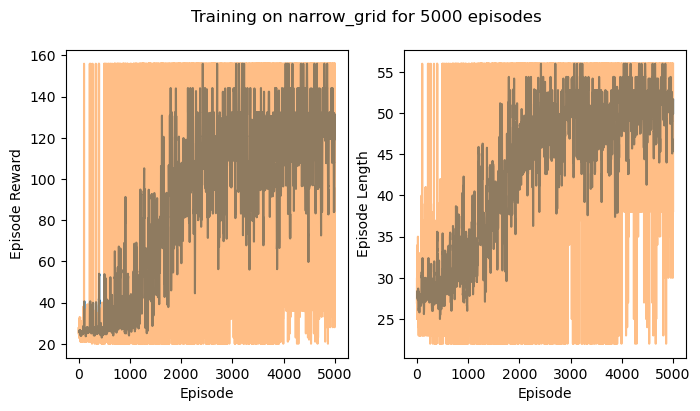

====== Training on wide_grid ======
Episode:   2500, avg.ret.: 54.1800 (over last 100 episodes)
Episode:   5000, avg.ret.: 75.5600 (over last 100 episodes)


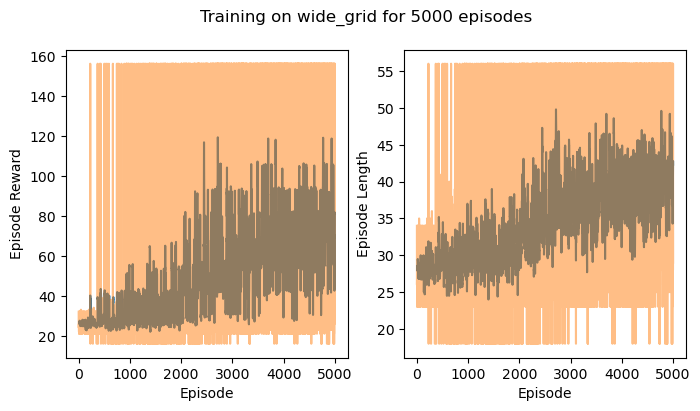

====== Training on random_grid ======


In [3]:
episodes = 5_000
for conf_name in train_conf.keys():
    print(f"====== Training on {conf_name} ======")
    env = VanillaEnv(list(train_conf[conf_name]))

    policy: ActorCriticNet = ActorCriticNet()
    optimizer = optim.Adam(policy.parameters(), lr=0.001)

    logger1 = ConsoleLogger(log_every=2500, average_over=100)
    logger2 = FigureLogger()
    tracker = Tracker(logger1, logger2)

    ppo = PPO(policy, env, optimizer, seed=31, tracker=tracker)
    ppo.learn(episodes)
    ppo.save('./ckpts', conf_name, info={'conf': list(train_conf[conf_name])})

    fig = logger2.get_figure(fig_size=(8, 4))
    fig.suptitle(f"Training on {conf_name} for {episodes} episodes")
    plt.show()
    
